# 회귀분석(Linear Regression)
Wikipedia(https://en.wikipedia.org/wiki/Linear_regression): a **Linear regression** is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or *independent variables*). The case of one explanatory variable is called **simple linear regression**. For more than one explanatory variable, the process is called **multiple linear regression**. This term is distinct from **multivariate linear regression**, where multiple correlated dependent variables are predicted, rather than a single scalar variable.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/220px-Linear_regression.svg.png)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/adb31f58da0d8a129f978dcea8512426a8c407e1)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/220px-Linear_least_squares_example2.png)

회귀분석(https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80): 통계학에서, 선형 회귀(線型回歸, 영어: linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.[참고 1]

선형 회귀는 선형 예측 함수를 사용해 회귀식을 모델링하며, 알려지지 않은 파라미터는 데이터로부터 추정한다. 이렇게 만들어진 회귀식을 선형 모델이라고 한다.

선형 회귀는 깊이있게 연구되고 널리 사용된 첫 번째 회귀분석 기법이다.[3] 이는 알려지지 않은 파라미터에 대해 선형 관계를 갖는 모델을 세우는 것이, 비선형 관계를 갖는 모델을 세우는 것보다 용이하기 때문이다.

선형 회귀는 여러 사용 사례가 있지만, 대개 아래와 같은 두 가지 분류 중 하나로 요약할 수 있다.

값을 예측하는 것이 목적일 경우, 선형 회귀를 사용해 데이터에 적합한 예측 모형을 개발한다. 개발한 선형 회귀식을 사용해 y가 없는 x값에 대해 y를 예측하기 위해 사용할 수 있다.
종속 변수 y와 이것과 연관된 독립 변수 X1, ..., Xp가 존재하는 경우에, 선형 회귀 분석을 사용해 Xj와 y의 관계를 정량화할 수 있다. Xj는 y와 전혀 관계가 없을 수도 있고, 추가적인 정보를 제공하는 변수일 수도 있다.
일반적으로 최소제곱법(least square method)을 사용해 선형 회귀 모델을 세운다. 최소제곱법 외에 다른 기법으로도 선형 회귀 모델을 세울 수 있다. 손실 함수(loss fuction)를 최소화 하는 방식으로 선형 회귀 모델을 세울 수도 있다. 최소제곱법은 선형 회귀 모델 뿐 아니라, 비선형 회귀 모델에도 적용할 수 있다. 최소제곱법과 선형 회귀는 가깝게 연관되어 있지만, 그렇다고 해서 동의어는 아니다.

### 1. scikit learn에서 제공하는 보스톤 데이터 로드 및 train/test 분리
1. sklearn.datasets에서 boston 데이터를 읽어온다.
2. train_test_split을 이용하여 train set과 test set으로 분리한다.
3. 분리된 data set의 크기를 확인한다.

In [1]:
# 데이터 준비하기 
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


### 2. 데이터에 대한 정보를 얻기 위해 그래프 그리기
boston data set에서 X에 해당하는 각각의 값과 y의 값으로 그래프를 그려서 각 x값과 y의 관계를 직관적으로 살펴본다.

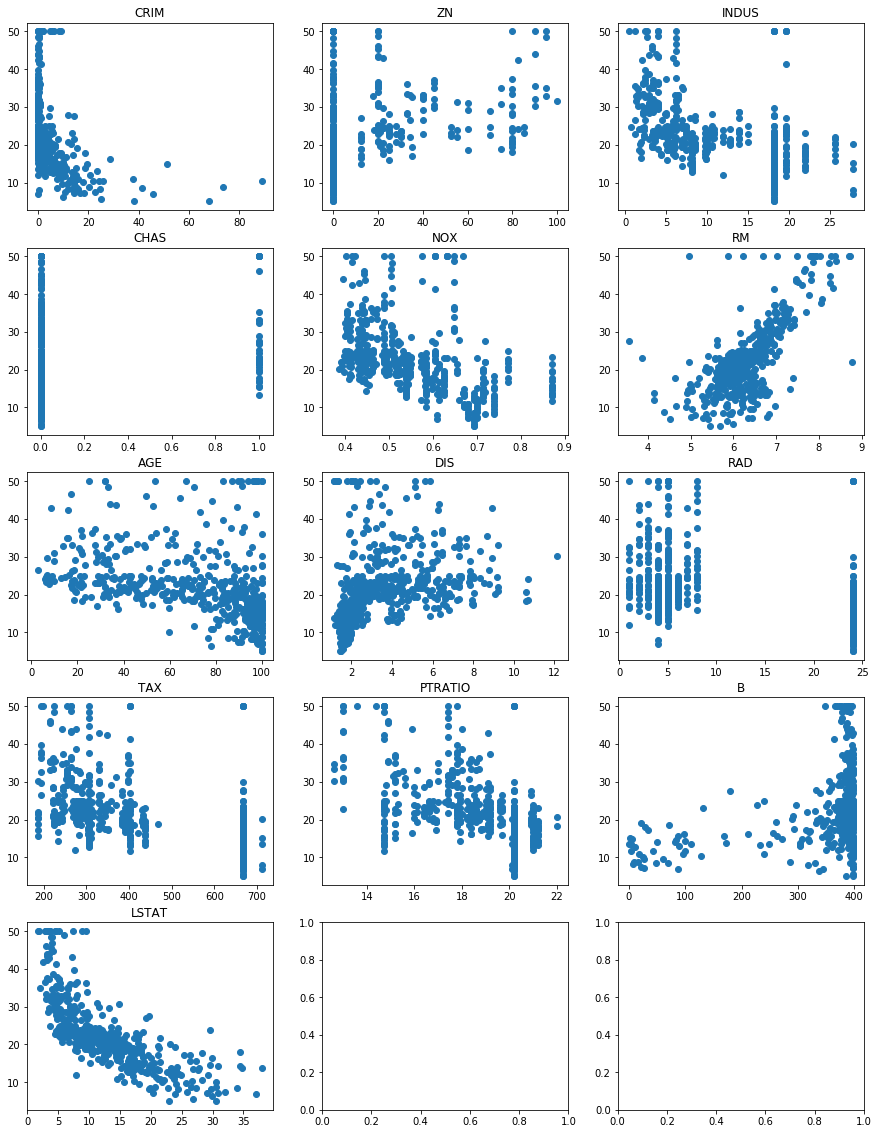

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
y = boston.target

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < boston.data.shape[1]:
        x = boston.data[:,i]

        ax.set_title(boston.feature_names[i])
        ax.scatter(x, y)
plt.show()

In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Sklearn LinearRegression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
<br>coefficient: indepenent variables의 계수
<br>intercept: 상수 (bias)
<br>Sklearn이 제공하는 **LinearRegression**을 이용하여 회귀분석을 실시

### 3. 단순회귀분석(Simple linear regression)
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
<br>먼저 단순회귀분석, 즉 독립변수가 하나인 모형에 대해 실습한다.
<br>위에서 직관적으로 살펴본 그래프들 중에서 연관성이 높아보이는 RM부터 시작한다.

In [4]:
#simple linear regression
from sklearn.linear_model import LinearRegression
# graph에서 RM이 정의 방향으로 유의한 영향을 끼치는 것으로 보이므로, RM을 독립변수로 선택
lr = LinearRegression()  #객체를 생성
lr.fit(X_train[:,5].reshape(-1, 1), Y_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# LinearRegression은 다중회귀분석 즉 독립변수가 여러개인 모형을 기본으로 하고 있기 때문
print(lr) # 모형정보를 확인, 사용된 parameter를 알 수 있음 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [5]:
#모형 기본 정보 보기
print('coef_', lr.coef_) #계수 - 즉 기울기
print('intercept_', lr.intercept_) #상수
print('R2 score for train set', lr.score(X_train[:,5].reshape(-1, 1), Y_train)) #train set에 대한 적합도 - 모형이 얼마나 잘 맞나

coef_ [8.60580243]
intercept_ -31.500906356655005
R2 score for train set 0.438646866900979


In [6]:
# test set에 대한 예측
P_test = lr.predict(X_test[:,5].reshape(-1, 1)) #predict 함수를 이용
print('prediction', P_test)
print('R2 score for test set', lr.score(X_test[:,5].reshape(-1, 1), Y_test)) #test set에 대한 적합도

prediction [28.94624993 36.68286632 21.12357552 21.31290318 14.48850185 21.79482811
 20.75352602 19.08400035 30.88255548 16.92394394 17.81894739 21.06333491
 20.45232293 23.5332002  10.49540952 16.95836715 22.01857898 21.92391515
 30.07361005 28.21475673  8.3267473  22.42305169 17.95664023 27.53489834
 18.25784331 23.48156539 30.00476363 43.40399802 31.82058795 17.62101393
 15.00484999 30.01336944 19.69501232 20.31463009 27.01855019 18.86024948
 19.79828195 21.33872058 11.8379147  19.9876096  23.79137428 19.31635701
 21.3817496  20.72770861 22.53492712 13.12878506 19.25611639 21.22684515
 24.9187344  16.8034627  19.72082973 24.30772242 40.24566853 21.25266256
 18.87746109 23.8602207  25.43508254 20.64165059 23.33526675 25.93421908
 23.55901761 23.01685206 21.53665404 21.24405676 20.6846796  19.81549355
 34.64329115 17.56077332 17.61240813 22.8189186  18.72255664 23.61065243
 24.53147329 34.68632016 19.13563516 32.94794807 30.14245647 29.09254858
 25.11666785 20.39208232 17.66404294 23.

위 결과를 보면 train set과 test set에 대한 R2 값이 비슷한 것을 볼 수 있다.
<br>이는 나쁘지 않은 결과에 속함

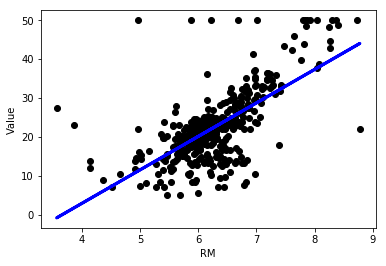

In [7]:
# train set에 대한 graph
Y_predict = lr.predict(X_train[:,5].reshape(-1, 1))
plt.xlabel(boston.feature_names[5])
plt.ylabel('Value')
plt.scatter(X_train[:,5], Y_train, color='black') #검은 점은 실제 값
plt.plot(X_train[:,5], Y_predict, color='blue', linewidth=3) #예측된 값은 직선이 됨
plt.show()

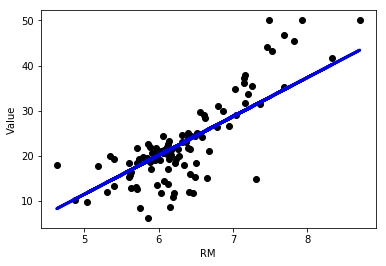

In [8]:
# test set에 대한 graph
Y_predict = lr.predict(X_test[:,5].reshape(-1, 1))
plt.xlabel(boston.feature_names[5])
plt.ylabel('Value')
plt.scatter(X_test[:,5], Y_test, color='black')
plt.plot(X_test[:,5], Y_predict, color='blue', linewidth=3)
plt.show()

In [9]:
#simple linear regression 예제 하나 더
from sklearn.linear_model import LinearRegression

# graph에서 LSTAT이 역방향으로 유의한 영향을 끼치는 것으로 보이므로, LSTAT을 독립변수로 선택
lr = LinearRegression().fit(X_train[:,-1].reshape(-1, 1), Y_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# 위 예는 객체생성과 fit을 한번에 수행

print(lr) #사용된 parameter를 알 수 있음 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [10]:
#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train[:,-1].reshape(-1, 1), Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test[:,-1].reshape(-1, 1), Y_test)))

coef_ [-0.96042881]
intercept_ 34.59535316570472
R2 score for train set: 0.545
R2 score for test set: 0.539


R2 score를 보면 RM에 비해 LSTAT이 적합도가 더 높은 것을 알 수 있다.

### 4. 다중회귀분석(Multiple linear regression)
독립변수가 여러 개인 회귀모형<br>
보스톤 데이터 셋에서 전체 feature를 전부 사용

In [11]:
#multiple linear regression 예제
lr = LinearRegression().fit(X_train, Y_train)
print(lr) #사용된 parameter를 알 수 있음 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [12]:
print('coef_', lr.coef_) #사용된 모든 독립변수에 대한 계수(기울기)를 반환
print('intercept_', lr.intercept_)

coef_ [-1.07558804e-01  4.39993152e-02  5.13902089e-03  2.58932690e+00
 -1.75110877e+01  3.48737419e+00  4.92246072e-04 -1.56575860e+00
  2.95603490e-01 -1.04883709e-02 -8.68572471e-01  1.10137534e-02
 -5.75101120e-01]
intercept_ 36.64488337374495


예측결과와 실제값과의 관계를 그래프로 확인<br>
독립변수가 여러개이기 때문에 독립변수-종속변수 관계로 그래프를 그리기 어려움.<br>
따라서 실제 값을 X축에 놓고 예측된 값을 Y축으로 해서 그래프를 그리고 적합도를 직관적으로 봄

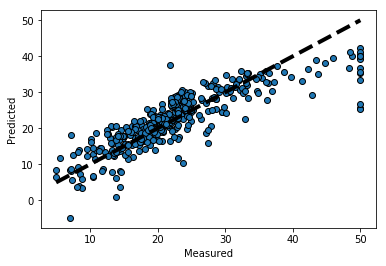

In [13]:
predicted = lr.predict(X_train) #먼저 값을 예측

fig, ax = plt.subplots()
ax.scatter(Y_train, predicted, edgecolors=(0, 0, 0)) #실제값과 예측값으로 점을 찍어 표시 - 둘이 다를 수 있음
ax.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4) #실제값과 예측값이 같은 지점을 연결해서 선을 표시
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
print('R2 score for train set: {:.3f}'.format(lr.score(X_train, Y_train)))
print('R2 score for test set: {:.3f}'.format(lr.score(X_test, Y_test)))

R2 score for train set: 0.723
R2 score for test set: 0.793


R2 score를 보면 단순회귀분석에 비해 적합도(정확하게는 설명력)가 높아진 것을 볼 수 있다.

### 5. 특성 스케일링(feature scaling) - 데이터 변환 혹은 표준화
어떤 머신러닝 알고리즘은 독립변수들의 스케일이 많이 다르면 잘 작동하지 않음<br>
따라서 일정한 범위로 변수들을 조정할 필요가 있음<br>
**StandardScaler**는 변수의 값들을 표준화시켜주는데, 표준화는 평균으로 빼고 표준편차로 나누는 것을 의미<br>
다른 스케일링 방식으로 min-max scaling이 있는데, 이는 최소값을 뺀 후, 최대값과 최소값의 차이로 나누어줌<br>
그 결과, 값을 0과 1 사이로 변환하는데, min-max에 비해 standardize는 이상치에 더 강하다는 장점이 있음

In [15]:
#multiple linear regression Standardize 예제
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
print('scaler mean:', scaler.mean_)
print('scaler variance:', scaler.var_)

scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)

slr = LinearRegression()
slr.fit(scaled_X_train, Y_train)
print('coef_', slr.coef_)
print('intercept_', slr.intercept_)

StandardScaler(copy=True, with_mean=True, with_std=True)
scaler mean: [3.91384354e+00 1.12326733e+01 1.13194307e+01 6.43564356e-02
 5.54511881e-01 6.27330198e+00 6.83237624e+01 3.74767426e+00
 9.77722772e+00 4.12235149e+02 1.84455446e+01 3.55545990e+02
 1.26083911e+01]
scaler variance: [8.71191429e+01 5.36147596e+02 4.75088346e+01 6.02146848e-02
 1.27308748e-02 4.89354503e-01 7.88004930e+02 4.28653830e+00
 7.76137388e+01 2.89489422e+04 4.64540094e+00 8.50722293e+03
 4.88529313e+01]
coef_ [-1.00392845  1.01879804  0.03542155  0.63538666 -1.97579666  2.43955348
  0.01381805 -3.24173984  2.60422713 -1.78453218 -1.87205094  1.01584923
 -4.01966192]
intercept_ 22.48589108910894


변환된 값을 이용하여 수행한 회귀분석에 대해 설명력을 출력<br>
결과를 보면 변환전과 차이가 없음. 즉, 보스톤 데이터는 변환이 별 영향을 미치지 않음을 알 수 있음

In [16]:
print('R2 score for train set: {:.3f}'.format(slr.score(scaled_X_train, Y_train)))
print('R2 score for test set: {:.3f}'.format(slr.score(scaled_X_test, Y_test)))

R2 score for train set: 0.723
R2 score for test set: 0.793


### 과대적합(Overfitting)과 과소적합(Underfitting)
Overfitting(과대적합): train set에 대해 너무 과하게 학습되어 test set에 대한 예측력이 떨어지는 경우
<br>Underfitting(과소적합): 학습이 부족해서 train set의 구조를 잘 반영하지 못한 경우
![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Overfitted_Data.png/300px-Overfitted_Data.png)

### 6. 다항식(polynomial) features 변환
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
<br>Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].<br>
선형회귀분석은 기본적으로 직선으로 연관성을 찾으려는 시도라고 볼 수 있는데, 주어진 독립변수들에 대해 제곱이나 변수들 간의 곱 - 다항식을 독립변수로 추가하면 다양한 곡선으로 적합이 가능.
<br>http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) #2차항까지 생성
#poly = PolynomialFeatures(degree=2, interaction_only=True) #같은 항의 제곱을 제외하고 다른 항끼리의 곱만으로 생성 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X_train vs X_train_poly: ', X_train.shape, X_train_poly.shape)

X_train vs X_train_poly:  (404, 13) (404, 105)


변환된 다항식을 이용하여 회귀분석을 수행<br>
위 결과와 비교할 때, train set에 대해서는 설명력이 높아졌으나, test set에 대해서는 오히려 설명력이 떨어짐<br>
즉 과대적합이 의심되는 상황임

In [18]:
lr = LinearRegression().fit(X_train_poly, Y_train)
print('R2 score for polynomial train set: {:.3f}'.format(lr.score(X_train_poly, Y_train)))
print('R2 score for polynomial test set: {:.3f}'.format(lr.score(X_test_poly, Y_test)))

R2 score for polynomial train set: 0.933
R2 score for polynomial test set: 0.856


### 7. 릿지회귀(Ridge regression)
https://brilliant.org/wiki/ridge-regression/
Tikhonov Regularization, colloquially known as **ridge regression**, is the most commonly used regression algorithm to approximate an answer for an equation with no unique solution. This type of problem is very common in machine learning tasks, where the "best" solution must be chosen using limited data.

https://en.wikipedia.org/wiki/Tikhonov_regularization
the most commonly used method of **regularization** of ill-posed problems. In statistics, the method is known as **ridge regression**, in machine learning it is known as **weight decay**, and with multiple independent discoveries.
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

릿지회귀는 과대적합을 방지하기 위한 방법으로, 각 독립변수에 대한 계수가 과도하게 커지는 것을 방지<br>
**LinearRegression**과 동일한 방법으로 사용함
![](https://ds055uzetaobb.cloudfront.net/image_optimizer/37ea8b78480bb520a3e30b7113689f7b77cecc2d.png)

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_poly, Y_train)
#ridge = Ridge(alpha=10).fit(X_train_poly, Y_train)
print('Ridge R2 score for polynomial train set: {:.3f}'.format(ridge.score(X_train_poly, Y_train)))
print('Ridge R2 score for polynomial test set: {:.3f}'.format(ridge.score(X_test_poly, Y_test)))

Ridge R2 score for polynomial train set: 0.925
Ridge R2 score for polynomial test set: 0.875


위 결과를 보면 사용한 후에 test set에서의 설명력이 월등히 좋아진 것을 볼 수 있다.

### 8. 라쏘회귀(Lasso regression)
https://en.wikipedia.org/wiki/Lasso_(statistics)
In statistics and machine learning, **lasso** (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both **variable selection** and **regularization** in order to enhance the prediction accuracy and **interpretability** of the statistical model it produces. 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

라쏘회귀는 릿지회귀와 비슷하나, 계수가 0에 가까우면 0으로 만드는 성향이 있다. <br>
즉, 특정 독립변수는 종속변수에 전혀 영향을 미치지 못하게 되며 모형에서 제외된다.

In [20]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train_poly, Y_train)
print('Lasso R2 score for polynomial train set: {:.3f}'.format(lasso.score(X_train_poly, Y_train)))
print('Lasso R2 score for polynomial test set: {:.3f}'.format(lasso.score(X_test_poly, Y_test)))
print('Used features count: {}'.format(np.sum(lasso.coef_ != 0))) #계수가 0이 아닌 독립변수의 수를 출력

Lasso R2 score for polynomial train set: 0.872
Lasso R2 score for polynomial test set: 0.905
Used features count: 58


C:\Users\neo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


위 결과를 보면 다항식 변환을 한 후에 변수가 총 105개였으나 라쏘회귀에서는 54개만 사용된 것을 볼 수 있다.<br>
설명력은 릿지회귀보다는 떨어지지만 사용되지 않은 것에 비해서는 높다.
경고를 보면 모형이 수렴하지 못했다는 것을 알 수 있으며, 이를 해결하기 위한 방법으로 iteration 수의 증가를 제안하고 있다.
iteration의 증가 외에 수렴여부의 조건(tol) 자체를 조정할 수 있다.

In [21]:
lasso01 = Lasso(max_iter=1000000).fit(X_train_poly, Y_train)
print('Lasso R2 score for polynomial train set: {:.3f}'.format(lasso01.score(X_train_poly, Y_train)))
print('Lasso R2 score for polynomial test set: {:.3f}'.format(lasso01.score(X_test_poly, Y_test)))
print('Used features count: {}'.format(np.sum(lasso01.coef_ != 0)))

Lasso R2 score for polynomial train set: 0.874
Lasso R2 score for polynomial test set: 0.905
Used features count: 51


그 결과 수렴했으나 설명력은 딱히 좋아지지는 않았다.